In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_train=pd.read_csv(r"C:\Users\ashis\Downloads\train1.csv")
df_train.columns=["Full_Date","Tweet"]
df_train["Full_Date"]=pd.to_datetime(df_train["Full_Date"])
df_train["Date"]=df_train["Full_Date"].dt.date
df_train["Day_numerical"]=df_train["Full_Date"].dt.day
print (df_train.head())

            Full_Date                                              Tweet  \
0 2017-09-26 22:27:00  b"@JoshChapinKHOU @KHOU @bucees @GasBuddy Can'...   
1 2017-09-26 22:10:00  b'Fill up now! Gas is expected to go up to 105...   
2 2017-09-26 22:08:00  b'RT @GasBuddy: We collected millions of #gas ...   
3 2017-09-26 22:02:00  b'I found this app called GasBuddy that helps ...   
4 2017-09-26 22:02:00  b'@GasBuddy ridiculously unhelpful error! http...   

         Date  Day_numerical  
0  2017-09-26             26  
1  2017-09-26             26  
2  2017-09-26             26  
3  2017-09-26             26  
4  2017-09-26             26  


In [2]:
#converting string object into datetime
df_train["Date"]=pd.to_datetime(df_train["Date"],format="%Y/%m/%d")
df_train["Day"]=df_train["Date"].dt.weekday_name
df_train.head()

,Full_Date,Tweet,Date,Day_numerical,Day
0,2017-09-26 22:27:00,"b""@JoshChapinKHOU @KHOU @bucees @GasBuddy Can'...",2017-09-26,26,Tuesday
1,2017-09-26 22:10:00,b'Fill up now! Gas is expected to go up to 105...,2017-09-26,26,Tuesday
2,2017-09-26 22:08:00,b'RT @GasBuddy: We collected millions of #gas ...,2017-09-26,26,Tuesday
3,2017-09-26 22:02:00,b'I found this app called GasBuddy that helps ...,2017-09-26,26,Tuesday
4,2017-09-26 22:02:00,b'@GasBuddy ridiculously unhelpful error! http...,2017-09-26,26,Tuesday


        Date        Day  Count
0 2017-09-17     Sunday     21
1 2017-09-18     Monday     83
2 2017-09-19    Tuesday     66
3 2017-09-20  Wednesday     47
4 2017-09-21   Thursday     38


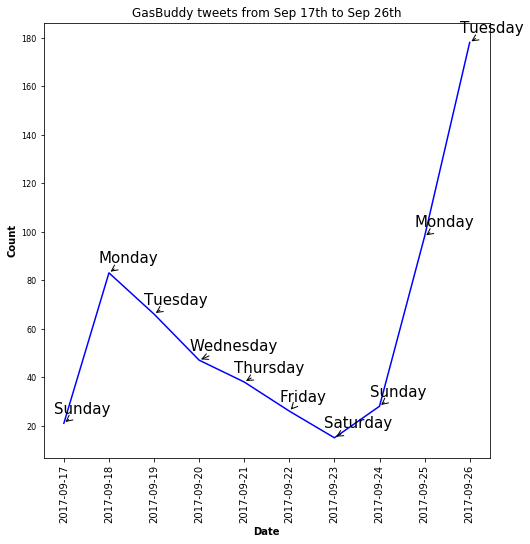

In [8]:
#visualizing by date
df_date=df_train.groupby(["Date","Day"])["Tweet"].count().reset_index()
df_date.columns=["Date","Day","Count"]
print (df_date.head())
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.figure(figsize=(8,8))
plt.plot_date(df_date["Date"],df_date["Count"],fmt="b-")
for label,x,y in zip(df_date["Day"],df_date["Date"],df_date["Count"]):
    plt.annotate(label,xy=(x,y),xytext=(-10,10),textcoords='offset points',arrowprops=dict(arrowstyle="->"),fontsize=15)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("GasBuddy tweets from Sep 17th to Sep 26th")
plt.xticks(rotation=90,fontsize=10)
plt.savefig(r"C:\Users\ashis\Desktop\tweet.png",format="png",dpi=2000)

plt.show()


In [89]:
from datetime import datetime
df_train["Time"]=df_train["Full_Date"].dt.time
print (df_train.dtypes)
df_train["Time"]=df_train["Time"].apply(lambda x:datetime.strptime(str(x),"%H:%M:%S").strftime('%I %p'))
print (df_train.head())

Full_Date        datetime64[ns]
Tweet                    object
Date             datetime64[ns]
Day_numerical             int64
Day                      object
Time                     object
dtype: object
            Full_Date                                              Tweet  \
0 2017-09-26 22:27:00  b"@JoshChapinKHOU @KHOU @bucees @GasBuddy Can'...   
1 2017-09-26 22:10:00  b'Fill up now! Gas is expected to go up to 105...   
2 2017-09-26 22:08:00  b'RT @GasBuddy: We collected millions of #gas ...   
3 2017-09-26 22:02:00  b'I found this app called GasBuddy that helps ...   
4 2017-09-26 22:02:00  b'@GasBuddy ridiculously unhelpful error! http...   

        Date  Day_numerical      Day   Time  
0 2017-09-26             26  Tuesday  10 PM  
1 2017-09-26             26  Tuesday  10 PM  
2 2017-09-26             26  Tuesday  10 PM  
3 2017-09-26             26  Tuesday  10 PM  
4 2017-09-26             26  Tuesday  10 PM  


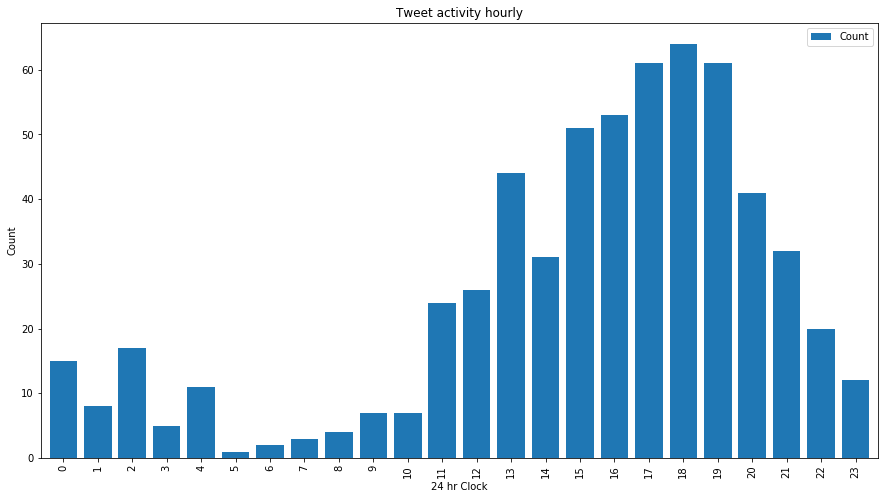

In [104]:
#visualizing the tweets on hourly basis
df_time=df_train.groupby(df_train["Full_Date"].dt.hour)["Tweet"].count().reset_index()
df_time.columns=["Hour","Count"]
df_time.plot(x="Hour",y="Count",kind="bar",width=0.8,figsize=(15,8))
plt.xlabel("24 hr Clock")
plt.ylabel("Count")
plt.title("Tweet activity hourly")
plt.show()

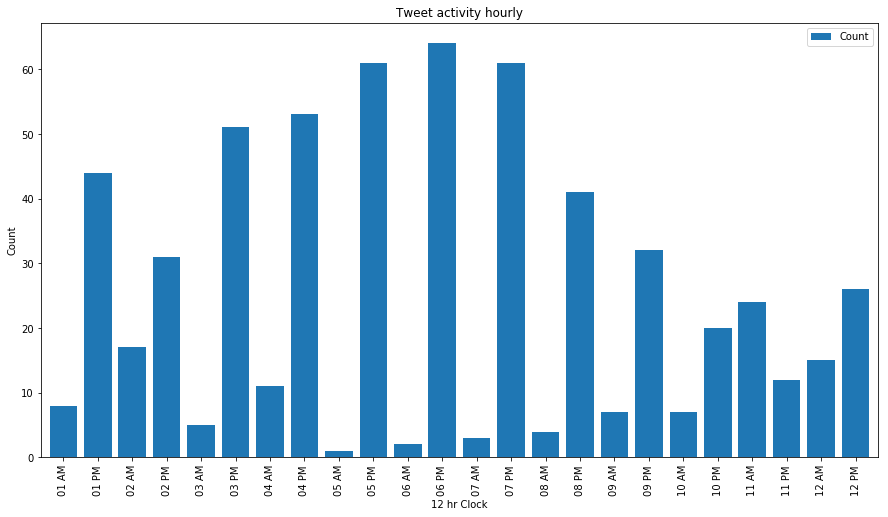

In [105]:
df_time=df_train.groupby(df_train["Time"])["Tweet"].count().reset_index()
df_time.columns=["Hour","Count"]
df_time.plot(x="Hour",y="Count",kind="bar",width=0.8,figsize=(15,8))
plt.xlabel("12 hr Clock")
plt.ylabel("Count")
plt.title("Tweet activity hourly")
plt.show()

In [92]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#preprocessing the tweets
def tweetcleaning(tweet):
    #making all the words in the tweet lowercase:
    tweet=tweet.lower()
    #making @word to user and #word to word
    tweet=re.sub(r"@([^\s]+)"," ",tweet)
    tweet=re.sub(r"#([^\s]+)",r"\1",tweet)
    #removing the url to URL
    tweet=re.sub(r"((https?://[^\s]+)|(www/.[^\s]+))"," ",tweet)
    #removing the puntuation
    tweet=re.sub(r"[,!\.\\]+"," ",tweet)
    #removing the retweets
    tweet=re.sub(r"rt"," ",tweet)
   
    #removing not encoded properly like xfo 
    tweet=re.sub(r"x[^\s]+"," ",tweet)
    #removing b in front of the string
    tweet=re.sub(r"b'"," ",tweet)
    tweet=re.sub(r"(b\")"," ", tweet)
     #removing the extra space
    tweet=re.sub(r"[\s]+"," ",tweet)
    #removing the white space from front and back
    tweet=tweet.strip()

    return tweet
df_train["Tweet"]=df_train["Tweet"].apply(tweetcleaning)
print (df_train["Tweet"])

0                                    can't disagree more
1      fill up now gas is e to go up to 105 9 1 4 in ...
2      we collected millions of gas station coffee ra...
3      i found this app called gasbuddy that helps yo...
4                           ridiculously unhelpful error
5            i love bucee but their coffee is terrible '
6      gasoline is $2 75 at shell on corner of atlant...
7                         think there's different taste"
8      do you like gas station coffee? evidently says...
9                                 never been to one yet'
10     do you like gas station coffee? evidently says...
11     as if needed to get better says they have best...
12                                                 nope'
13     do you like gas station coffee? evidently says...
14     as if needed to get better says they have best...
15     as if needed to get better says they have best...
16     register today for queen city &lt;hack&gt; sep...
17     the national gas price a

In [93]:
#tokenizing the tweets
def wordtokenize(tweet):
    cleanedwordlist=[]
    wordlist=tweet.split()
    stoplist=set(stopwords.words("english"))
    for word in wordlist:
        value=re.search(r"^[a-zA-Z]+",word)
        if word in stoplist or value==None or len(word)<=2:
            continue
        else:
            cleanedwordlist.append(word)
    return (" ".join(cleanedwordlist))
df_train["Tweet"]=df_train["Tweet"].apply(wordtokenize)
print (df_train["Tweet"])
        

0                                         can't disagree
1                 fill gas calgary gasprices gasbuddyale
2      collected millions gas station coffee ratings ...
3      found app called gasbuddy helps find cheapest ...
4                           ridiculously unhelpful error
5                             love bucee coffee terrible
6      gasoline shell corner atlantic beverly losange...
7                         think there's different taste"
8      like gas station coffee? evidently says coffee...
9                                         never one yet'
10     like gas station coffee? evidently says coffee...
11     needed get better says best gas station coffee...
12                                                 nope'
13     like gas station coffee? evidently says coffee...
14     needed get better says best gas station coffee...
15     needed get better says best gas station coffee...
16     register today queen city presented innovation...
17     national gas price avera

In [94]:
list_tweets=df_train["Tweet"].tolist()
print (list_tweets)



["can't disagree", 'fill gas calgary gasprices gasbuddyale', 'collected millions gas station coffee ratings gasbuddy app showcase best state:', 'found app called gasbuddy helps find cheapest local gas prices check out:', 'ridiculously unhelpful error', 'love bucee coffee terrible', 'gasoline shell corner atlantic beverly losangeles montereypark gasbuddy mydayinla fill gas', 'think there\'s different taste"', 'like gas station coffee? evidently says coffee best gas station coffee nation thoug', "never one yet'", 'like gas station coffee? evidently says coffee best gas station coffee nation thoug', 'needed get better says best gas station coffee state nation thou', "nope'", 'like gas station coffee? evidently says coffee best gas station coffee nation thoug', 'needed get better says best gas station coffee state nation thou', 'needed get better says best gas station coffee state nation', 'register today queen city presented innovation place tenant yqr:', 'national gas price average cents

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
stoplist1=set(stopwords.words("english"))
vectorizer=CountVectorizer(analyzer="word",tokenizer=None,preprocessor=None,stop_words=stoplist1,max_features=5000)
df_new=vectorizer.fit_transform(list_tweets)
df_features=pd.DataFrame(df_new.toarray(),columns=vectorizer.get_feature_names())
dict_vocab=vectorizer.vocabulary_
print (df_features.head())
a=df_features.iloc[0,:]
print (a[a>0])

   12  accepting  according  account  accounts  acct  ach  achievement  \
0   0          0          0        0         0     0    0            0   
1   0          0          0        0         0     0    0            0   
2   0          0          0        0         0     0    0            0   
3   0          0          0        0         0     0    0            0   
4   0          0          0        0         0     0    0            0   

   across  activate ...   yegtraffic  yelp  yes  yesterday  york  z30  \
0       0         0 ...            0     0    0          0     0    0   
1       0         0 ...            0     0    0          0     0    0   
2       0         0 ...            0     0    0          0     0    0   
3       0         0 ...            0     0    0          0     0    0   
4       0         0 ...            0     0    0          0     0    0   

   zebrachat  zendrive  zion  zip  
0          0         0     0    0  
1          0         0     0    0  
2       

In [102]:
#analyzing what happened on 26th september
df_newinfo=pd.concat([df_train,df_features],axis=1)
df_26=df_newinfo[df_newinfo["Day_numerical"]==26]
print (df_26.head())
print (df_26.shape)
df_26_tweet=df_26.iloc[:,6:len(df_26.columns)]
print (df_26_tweet.head())
freq=df_26_tweet.sum(axis=0).reset_index()
freq.to_excel(r"C:\Users\ashis\Desktop\word_26.xlsx")

            Full_Date                                              Tweet  \
0 2017-09-26 22:27:00                                     can't disagree   
1 2017-09-26 22:10:00             fill gas calgary gasprices gasbuddyale   
2 2017-09-26 22:08:00  collected millions gas station coffee ratings ...   
3 2017-09-26 22:02:00  found app called gasbuddy helps find cheapest ...   
4 2017-09-26 22:02:00                       ridiculously unhelpful error   

        Date  Day_numerical      Day   Time  12  accepting  according  \
0 2017-09-26             26  Tuesday  10 PM   0          0          0   
1 2017-09-26             26  Tuesday  10 PM   0          0          0   
2 2017-09-26             26  Tuesday  10 PM   0          0          0   
3 2017-09-26             26  Tuesday  10 PM   0          0          0   
4 2017-09-26             26  Tuesday  10 PM   0          0          0   

   account ...   yegtraffic  yelp  yes  yesterday  york  z30  zebrachat  \
0        0 ...            0  